# COGS 108 - Final Project 

# Overview

Restaurants often cut corners in order to save on operating costs and to maximize profits, and thus health inspections are there to keep restaurants in check to make sure everything is safe and guidelines are followed. In general, people think that restaurants in poor areas are more likely to be dirty and more dangerous in terms of health hazards. Likewise, they think that restaurants in wealthy areas are held at a higher standard, but they don't really know that unless they actually look into it rather than just the storefront that they see. They would typically expect restaurants in wealthy areas to score higher on health inspections than restaurants in poor areas. After an analysis of restaurants in North Carolina, the data suggests that this is somewhat the case. 

# Name & GitHub ID

- Name: Yuhao Cao
- GitHub Username: aldencao

# Research Question

Do restaurants located in affluent areas score higher on average on health inspections than restaurants located in poor areas?

## Background and Prior Work

First we must understand what the health inspection score means. The health inspection has a numerical scoring system, with the maximum score being 100. In order to pass the inspection, a restaurant would need a score of 70. A restaurant with a score below would get its permit revoked, meaning the restaurant is not allowed to operate. A higher score means that the restaurant is following more of the guidelines and has less violations, meaning that the restaurant is cleaner and has less risks of food and health hazards.

Health inspection scores can vary even if restaurants at different locations are part of the same franchise, such as fast food chains. Some locations had many violations and scored poorly, while others had no violations at all and scored very well. 

References (include links):
- 1)https://www.courier-tribune.com/article/20140830/news/308309822
- 2)https://oklahoman.com/article/1423275/fast-food-chains-vary-in-health-department-scores

# Hypothesis


Since restaurants located in affluent areas are believe by the general public to be held at higher standards, they are expected to score higher on health inspections as well. 

# Dataset(s)

- Dataset Name: inspections
- Link to the dataset: inspections.csv
- Number of observations: 18466

The inspections dataset contains identifications, locations, and health inspection scores of each facility.

- Dataset Name: zipcodes
- Link to the dataset: zipcodes.csv
- Number of observations: 37

The zipcodes dataset contains zipcodes and their corresponding income and poverty information.

I combined these two datasets to match each zipcode with their health inspections scores, violations, and per capita income, as well as their averages based on each zipcode. 

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

1) Unneeded columns were discarded from inspections.

2) Discarded rows that were not restaurants.

3) Only kept zip and per capita income columns in df_zipcodes

4) Merged df_zipcodes with df_main so we can see the per capita income where the restaurant is located in.

5) Created a dataframe that combines all scores based on the same zipcodes to get the average scores in each zipcode. 

In [17]:
#load in inspections and zipcodes csvs
df_inspect = pd.read_csv('inspections.csv')
df_zipcodes = pd.read_csv('zipcodes.csv')

In [3]:
df_main = df_inspect[['hsisid','name', 'facilitytype','zip', 'score', 'num_critical', 'num_non_critical']]
df_main = df_main.loc[df_main['facilitytype'] == 'Restaurant']
df_zipcodes = df_zipcodes[['zip', 'per_capita_income_dollars']]

In [4]:
df_main = pd.merge(df_main, df_zipcodes, on = 'zip')
df_main.head()

,hsisid,name,facilitytype,zip,score,num_critical,num_non_critical,per_capita_income_dollars
0,4092013748,Cafe 3000 At Wake Med,Restaurant,27610,96.0,9,7,19207
1,4092014046,Overtime Sports Pub,Restaurant,27610,98.0,0,11,19207
2,4092015191,TASTE OF CHINA,Restaurant,27610,97.0,4,8,19207
3,4092015983,Cariokos,Restaurant,27610,97.0,4,10,19207
4,4092013137,SUBWAY #22217,Restaurant,27610,97.0,2,6,19207


In [5]:
df_average = df_main.groupby(['zip']).mean()
df_average.head()

,hsisid,score,num_critical,num_non_critical,per_capita_income_dollars
zip,,,,,
27501,4.092017e+09,94.750000,6.000000,4.000000,21631.0
27502,4.092015e+09,95.708661,3.448819,4.577428,36763.0
27511,4.092014e+09,96.194211,3.216842,6.022105,33139.0
27513,4.092015e+09,94.936433,5.434535,8.506641,41232.0
27518,4.092016e+09,96.947368,2.086466,4.695489,49865.0


# Data Analysis & Results

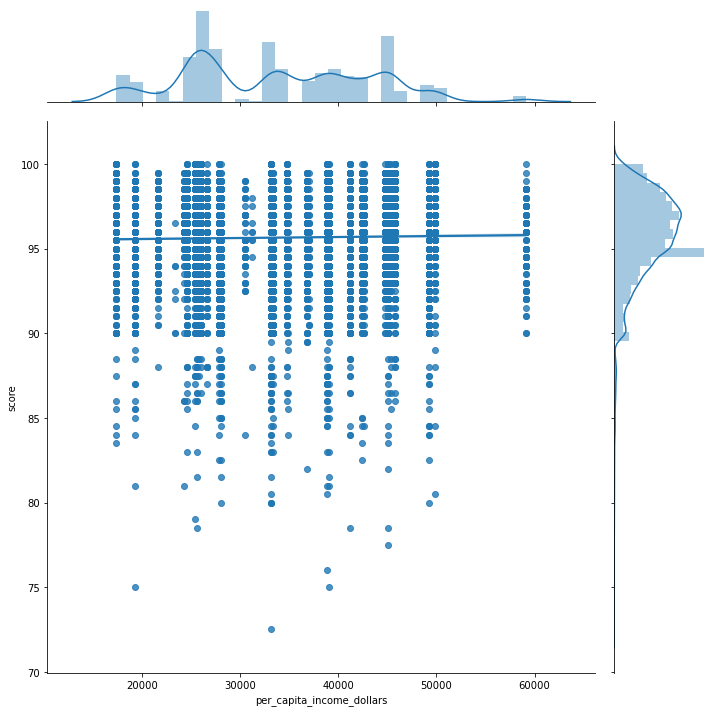

In [19]:
sns.jointplot(x="per_capita_income_dollars", 
              y="score", 
              data=df_main, 
              kind='reg', 
              height=10)

In this scatterplot above, we see that the regression lines shows that there is not much of a difference in health inspection scores between zipcodes(per capita income). However, we do see in the scatterplot that in the very wealthy zipcodes, all the scores are about 90 or above. 



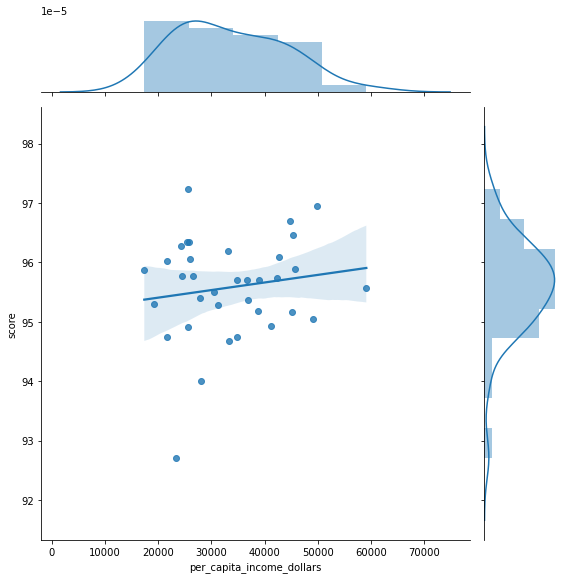

In [20]:
sns.jointplot(x="per_capita_income_dollars",
              y="score", 
              data=df_average, 
              kind='reg', 
              height=8)

In this scatterplot above, we're looking at the AVERAGE health inspection score per zipcode instead of every single observation. Here, the regression line shows more of a positive relationship between per capita income and health inspection score. On average, zipcodes with higher per capita income scores a just little bit higher than zipcodes with lower per capita income. 

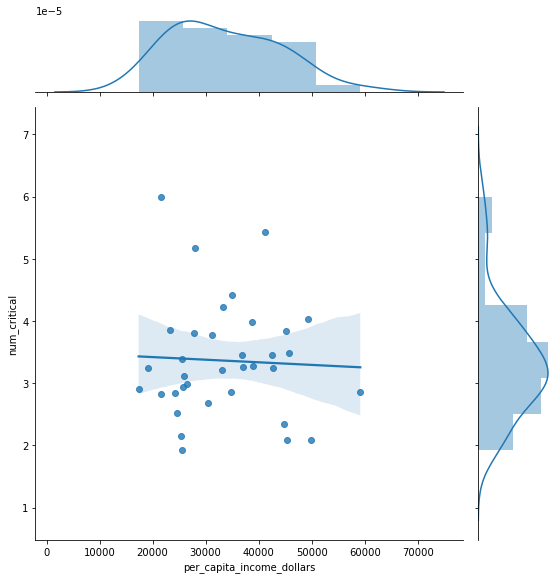

In [21]:
sns.jointplot(x="per_capita_income_dollars",
              y="num_critical", 
              data=df_average, 
              kind='reg', 
              height=8)

In this scatterplot above, we're looking at the AVERAGE number of critical violations per zipzode. We see that the regression line shows that zipcodes with lower per capita income has a slightly greater number of critical violations than zipcodes with higher per capita income.

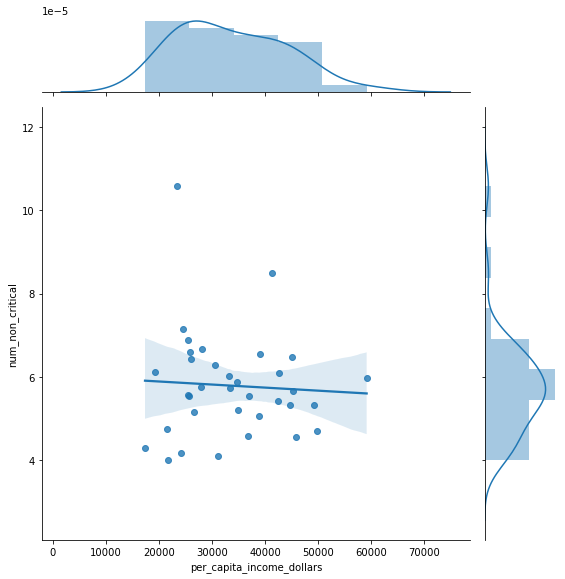

In [22]:
sns.jointplot(x="per_capita_income_dollars",
              y="num_non_critical", 
              data=df_average, 
              kind='reg', 
              height=8)

In this scatterplot above, we're looking at the AVERAGE number of non-critical violations per zipzode. We see that the result is very similar to the critical violations plot. 

Scatterplots were used to vizualize the data because we want to see the relationship between per capita income of each zipcodes and scores/violations. The results we see based on the plots only somewhat supports our hypothesis, because the differences are very slight, but are still supportive of our claim. 

# Ethics & Privacy

All of these informations are available online and could easily be found through a few Google searches. Also, information on health inspection of each restaurant is required to be made public, so I do not believe there are any privacy issues. The only possible concern is the names of the inspectors, but they were not needed in my data anyways so the names were discarded. Datasets used were not biased, as all observations were used. Health inspections in our use case are not biased, especially since they're government public records. 

There is a possible ethic issue from this analysis. People already have this idea that restaurants in wealthy areas are held at a higher standard, and this analysis does not disprove that. This only further supports their existing perception, and they're more likely to eat at restaurants in wealthier areas. This can cause economic damage to restaurants in less wealthy areas. To mitigate this, instead of using this analysis to inform people that restaurants in wealthy areas are cleaner, we should use this to spread awareness of cleanliness of restaurants. This will persuade restaurant owners to be cleaner. 

For restaurants that scored well on health inspections, they have nothing to worry about, as they're enticed to place their health inspection results at the front of their restaurant to show that they've aced the health inspection, and people know that they are clean. 

# Conclusion & Discussion

Are restaurants in wealthy areas held in a higher standard in terms of cleanliness? In order to answer that, I used every single health inspection done on restaurants in North Carolina. I matched their scores and number of violations to their corresponding zipcodes and per capita income. Scatterplots we used to see the relationship between per capita income(zipcodes) and their scores/violations. After analyzing the data, the graphs show that on average, restaurants in wealthier areas score slightly higher in health inspections, and have slightly less critical and non critical violations. 

A limitation of this analysis is that wealthy zipcodes do not contain only high end restaurants, as fast food chains do exist everywhere. Likewise, less wealthy zipcodes do not only contain low end restaurants and fast food chains. Thus, restaurants in wealthy zipcodes are not necessarily held at high standards. However, higher end restaurants are usually located in wealthier areas, so if we analyze the average and base the results on that, the limitation is weaker. 

As discussed in the ethics section, a possible impact this analysis has on society is that people who already think that restaurants in wealthier areas are of higher standards and are cleaner, will be further convinced of their impression and are more likely to go to restaurants in wealthier areas. This means that restaurants in less wealthy areas can potentially lose out on business, but this can also convince restaurants that are less clean to become more clean.